<a href="https://colab.research.google.com/github/RonnyGuevara/PROJECTS_2022/blob/main/CURSO/TP_OBLI_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

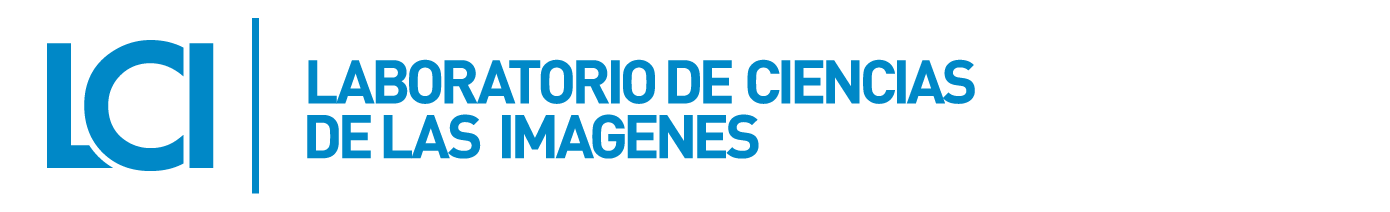

#**Universidad Nacional del Sur**
#Trabajo de Cátedra
##Imágenes & Introducción al Aprendizaje automático
##Tema: Clustering de una imagen

##Presentado por: Ronny Guevara
###Bahía Blanca - Argentina

###Requerimiento
1. **Abrir una imagen y explorar sus datos.**

+ a) Abra la imagen *vegetacion_cielo.jpg* (de la carpeta compartida), grafíquela y muestre la dimensión (cantidad de filas, columnas, canlaes), muestre el tipo de dato que contiene.
+ b) Realice el histograma de los 3 canales en un mismo gráfico. **Interprete y comente.**

2. **Binarización.** 

+ a) Pase la imagen a monocroma. Elija un umbral adecuado para binarizar dicha imagen monocroma, que *intente* separar el cielo de la vegentación, 
+ b) Muestre en subplots, la imagen original, la monocroma en escala de grises y la binarizada. Comente e interprete resultados.

3. **Clustering**

+ a) Pase la misma imagen vegetacion_cielo.jpg, a formato Data Frame (cada pixel en una fila)
+ b) Elija algún modelo de Clusterización (k-means,DBCAN, MeanShift) para realizar clusterización dentro de dicha imagen. 
Utilice las características que crea necesarias  y adecuadas para el problema (RGB a priori, pero pueden ser otras como las usadas en Ntb8).
¿Cuantos clusters recomienda el método del codo? ¿Concuerda con lo que ve en la imagen? 
+ c) Grafique los resultados de la clusterización en el espacio RGB y también en la imagen etiquetada por clusters.Obtuvo los resultados esperados? Comente, interprete.

##Desarrollo
El desarrollo se divide en 3 etapas, la primera tiene como objetivo abrir y explorar los datos de una imagen, la segunda el aplicar binarización a la imagen con un umbral adecuado, y finalmente, aplicar un modelo de clusterización

##1. **Abrir una imagen y explorar sus datos**

In [2]:
#Lectura de librerías
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import imageio as io
import random
from google.colab.patches import cv2_imshow

Se cargaran todas las librerias necesarias para abrir y explorar los datos de una imagen

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


La imagen se encuentra cargada en el Drive por lo que es necesario hacer el respectivo llamado

In [4]:
#Asignamos la ruta de llamado a la variable
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"

Apartado de funciones

In [5]:
#Función que permite leer una imagen sin limitación de UNIT8
def get_image(dir):
  image = io.v3.imread(dir)
  image = image.astype(np.int64)
  return image

#Función que permite plotear la imagen
def plot2_image(image,Imagen, cmap=None):
  #plt.figure(figsize=(10,7))
  plt.figure()
  plt.title(Imagen)
  plt.imshow(image,cmap=cmap)
  plt.grid(False)
  plt.show()

#Información de la imagen
def image_info(image):
  print('This image is', image.dtype)
  print('with dimensions', image.shape)

#Copia de la imagen Original
def image_copy(image):
  work_image=np.copy(image)
  return work_image 

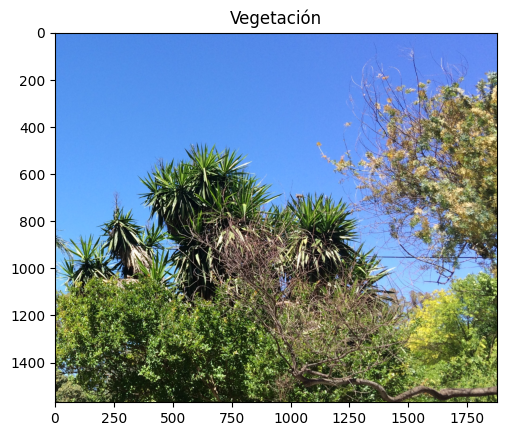

In [6]:
img = get_image (image)#Utilizamos la función get_image, para leer la imagen sin limitación de UNIT8
img_copy = image_copy (img)#Utilizaremos la función image_copy, para, por seguridad hacer una copia de la imagen
plot2_image(img,'Vegetación')#Con la función plot2_image renderizaremos la imagen 

In [7]:
image_info(img)#La función image_info devuelve el tipo de dato que contiene la imagen, así también, el total de sus columnas y filas y cantidad de canales. 

This image is int64
with dimensions (1569, 1879, 3)


##Histograma de canales
En este apartado, veremos el comportamiento del histograma de la imagen Vegetación transformada a escala de grises, posterior al análisis de los resultados, interpretaremos el comportamiento del histograma de sus 3 canales (R, G, B)

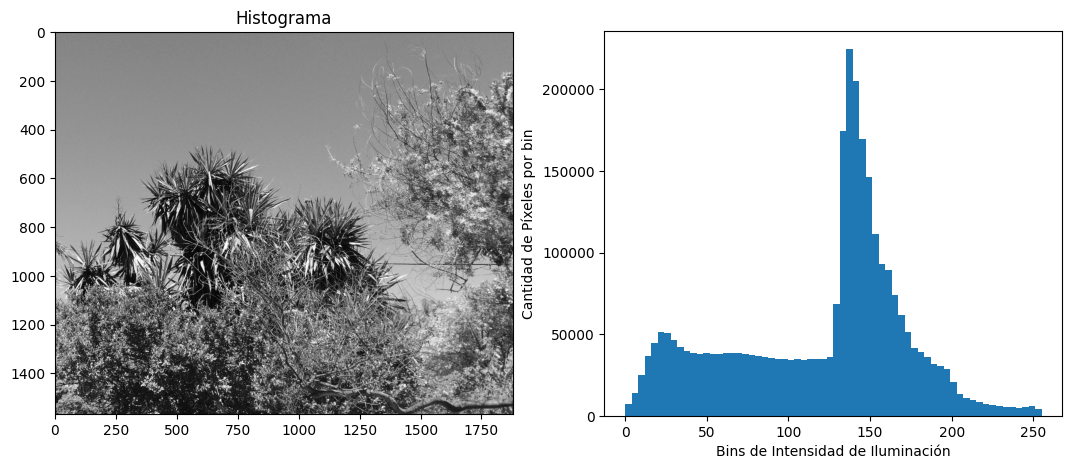

In [42]:
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"
img_gray = cv2.imread(image,cv2.IMREAD_GRAYSCALE)

nbins=64
rango=[0,255] #rango de intensidades que quiero que cuente el histograma.

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(5)
fig.set_figwidth(13)
axs[0].imshow(img_gray, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen_grayscale')

axs[1].hist(img_gray[:,:].ravel(),nbins,rango ) 
axs[0].set_title("Histograma")
axs[1].set_xlabel('Bins de Intensidad de Iluminación')
axs[1].set_ylabel('Cantidad de Píxeles por bin')

plt.show()

#Resultados


El comando hist de la librería matplotlib permite obtener el histograma de la imagen de acuerdo con la cantidad de clases elegidas por el usuario. 
Al analizar el histograma de la imagen, vemos una gran concentración de pixeles para los tonos comprendidos entre 140 y 142, abarcando los medios tonos de la imagen.
Discusión: Si el usuario es el responsable de seleccionar las clases para trazar el histograma, se puede crear un aplicativo que permita seleccionar dichas clases mediante un scrollbar.


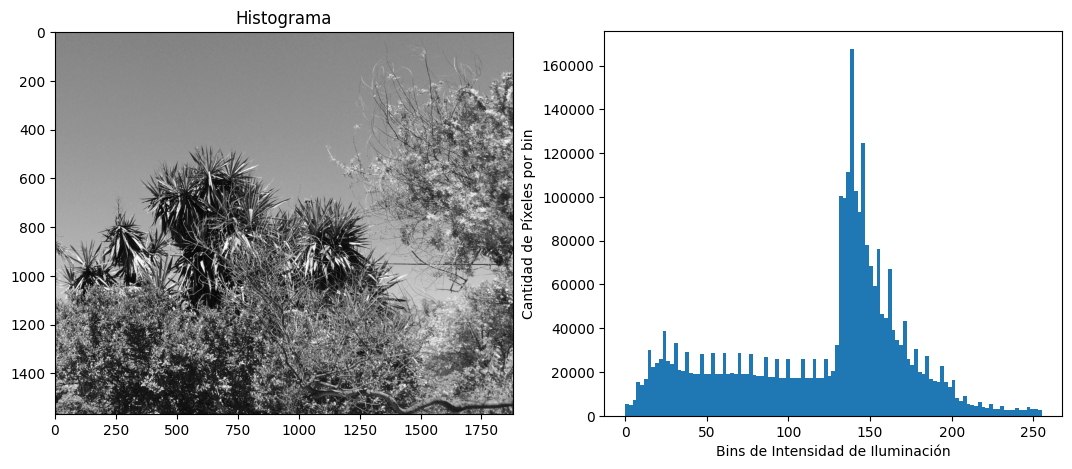

In [41]:
#@title Seleccione el número de clases { run: "auto" }
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"
img_gray = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
Bins = 111 #@param {type:"slider", min:0, max:255, step:1}
nbins=Bins
rango=[0,255] #rango de intensidades que quiero que cuente el histograma.

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(5)
fig.set_figwidth(13)
axs[0].imshow(img_gray, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen_grayscale')

axs[1].hist(img_gray[:,:].ravel(),nbins,rango ) 
axs[0].set_title("Histograma")
axs[1].set_xlabel('Bins de Intensidad de Iluminación')
axs[1].set_ylabel('Cantidad de Píxeles por bin')

plt.show()

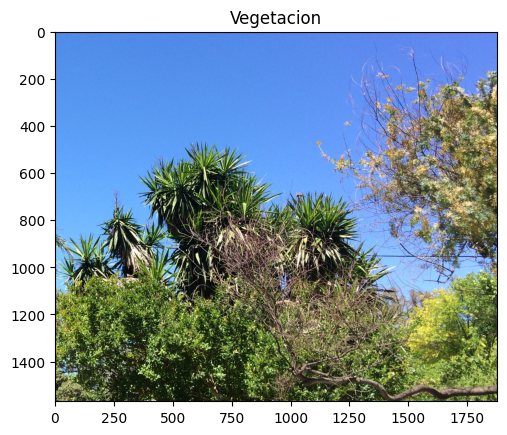

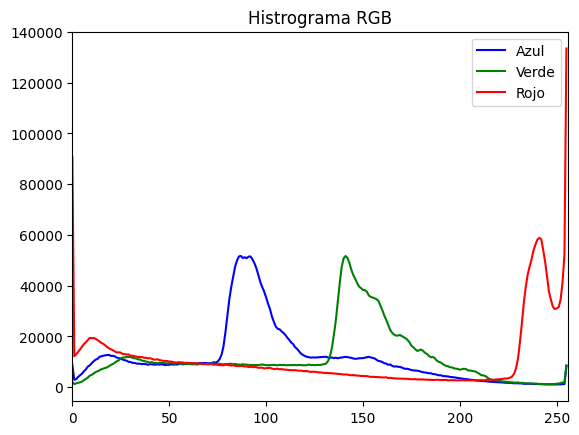

In [10]:
#Histogramas de R, G y B 
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"
img = cv2.imread(image)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_col = img
plot2_image(img,'Vegetacion')

color = ('b','g','r')
for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
plt.title('Histrograma RGB')
plt.legend(['Azul','Verde','Rojo'])
plt.show()

##Interpretación de resultados
Un histograma representa la distribución de los niveles de grises dentro de una imagen. El eje horizontal corresponde a la variedad de tonos (y va de negros a blancos), mientras que el vertical indica la cantidad de píxeles de cada tono.
En este primer apartado, hemos obtenido el histograma para la imagen en escala de grises y en sus colores originales (R, G, B). Para el primer caso vemos una gran concentración de pixeles para los tonos comprendidos entre 140 y 142, mientras que, el histograma RGB apreciamos en los tonos medios una gran concentración de color Azul y Verde, explicando por el cielo y la cantidad de vegetación de la imagen.

 

##2. **Binarización**

###2.1. Pasar la imagen a monocroma

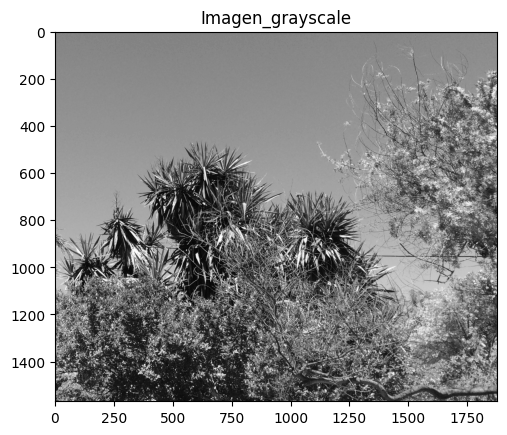

This image is uint8
with dimensions (1569, 1879)
Intensidad mínima 0
Intensidad máxima 255


In [11]:
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"#Lectura de la imagen
img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)#Conversión de la imagen del campo RGB a escala de grises
plot2_image(img,'Imagen_grayscale',cmap='gray')
image_info(img)#La función image_info devuelve el tipo de dato que contiene la imagen, así también, el total de sus columnas y filas y cantidad de canales. 
print(f'Intensidad mínima {np.min(img)}')
print(f'Intensidad máxima {np.max(img)}')

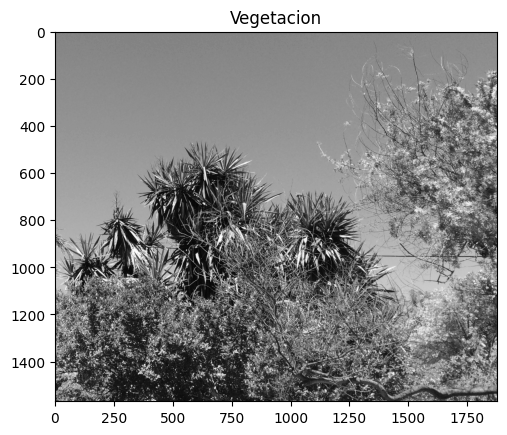

Intensidad mínima 0
Intensidad máxima 255


In [12]:
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"
img = cv2.imread(image)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plot2_image(img_gray,'Vegetacion',cmap='gray')
print(f'Intensidad mínima {np.min(img_gray)}')
print(f'Intensidad máxima {np.max(img_gray)}')

##2.2. Umbral de otsu
Debido a la complejidad de la imagen utilizaremos el método de OTSU para elegir el umbral de binarización de la imagen

In [13]:
img=img_gray #Copiamos la imagen monocroma a una nueva variable
ret0,binaria0 = cv2.threshold(img,0,255,cv2.THRESH_OTSU) 
print('Umbral de Otsu:', ret0)

Umbral de Otsu: 102.0


El método OTSU el cual calcula el valor umbral de forma que la dispersión dentro de cada segmento sea lo más pequeña posible, para la imagen da un resultado de 102.0, posterior, ocuparemos este valor como referencia para binarizar la imagen, a continuación se muestran los resultados:

In [14]:
def histo_RGB(img):
  color = ('b','g','r')
  for i, c in enumerate(color):
    hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([img], [1], None, [256], [0, 256])
    hist3 = cv2.calcHist([img], [2], None, [256], [0, 256])
 
  return hist1, hist2, hist3

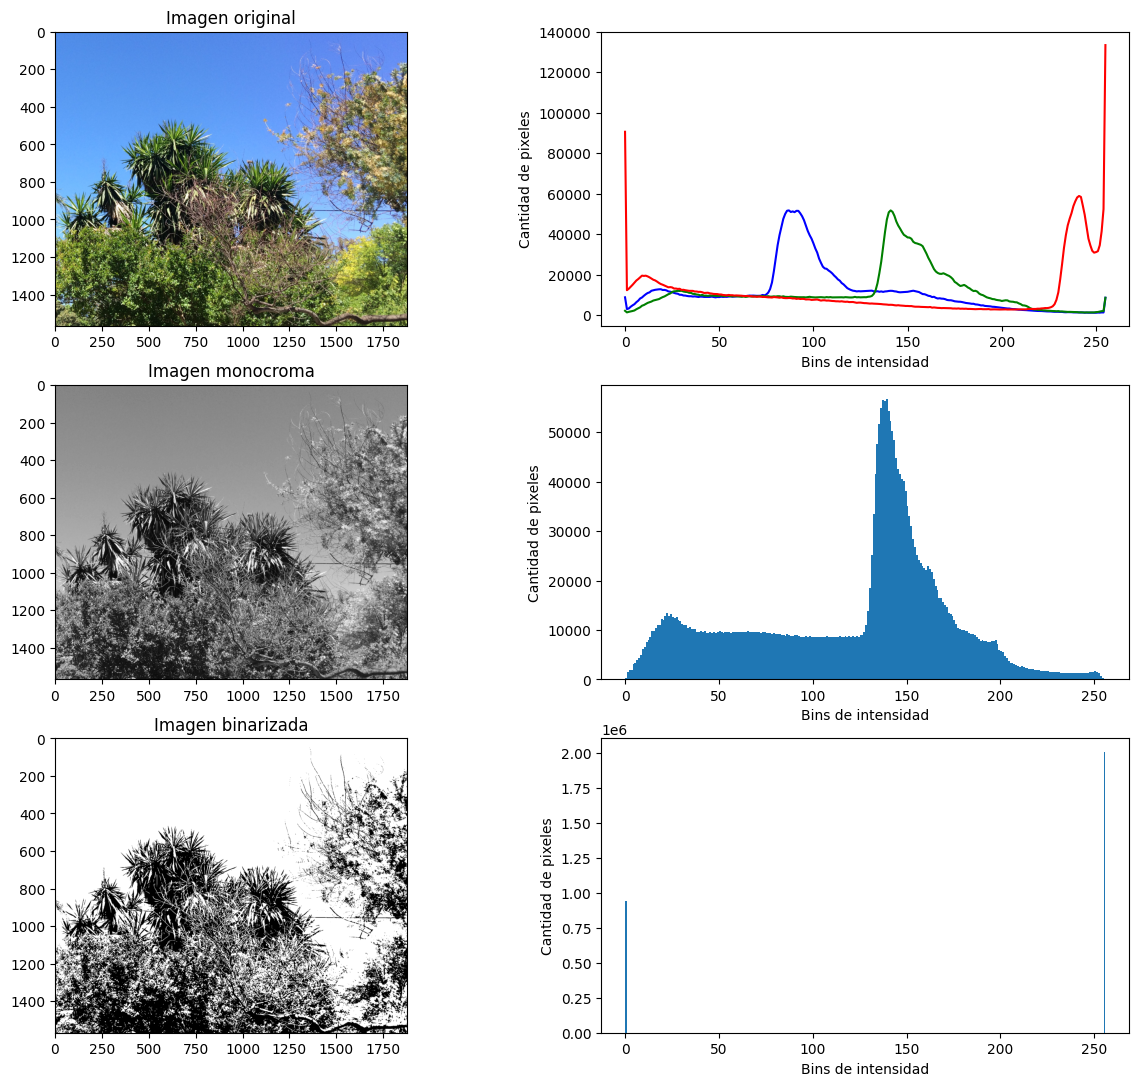

In [15]:
hist1, hist2, hist3 = histo_RGB(img_col)
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(13)
fig.set_figwidth(15)
axs[0].imshow(img_col, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].plot(hist1,color='b')
axs[1].plot(hist2,color='g')
axs[1].plot(hist3,color='r') 
axs[1].set_xlabel('Bins de intensidad')
axs[1].set_ylabel('Cantidad de pixeles')

axs[2].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen monocroma')
axs[3].hist(img[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('Bins de intensidad')
axs[3].set_ylabel('Cantidad de pixeles')

axs[4].imshow(binaria0, cmap='gray',vmin=0 ,vmax=255)
axs[4].set_title('Imagen binarizada')
axs[5].hist(binaria0[:,:].ravel(), 256,[0,256] ) 
axs[5].set_xlabel('Bins de intensidad')
axs[5].set_ylabel('Cantidad de pixeles')

plt.show()

##Interpretación de resultados
En el apartado de binarización hemos implementado el método de OTSU para calcular el valor umbral de forma que la dispersión dentro de cada segmento sea lo más pequeña posible, y, permita separar el cielo de la vegetación, como resultado, OTSU determina un umbral de 102.0. 
El resultado es una imagen binarizada donde se tiene una buena separación entre el cielo (255) y la vegetación(0), de acuerdo con el conteo de pixeles de tonalidad blanca, en la imagen predomina el cielo.
Discusión: Es posible crear un aplicativo que mediante un scrollbar el usuario pueda seleccionar cualquier umbral de binarización.

150.0


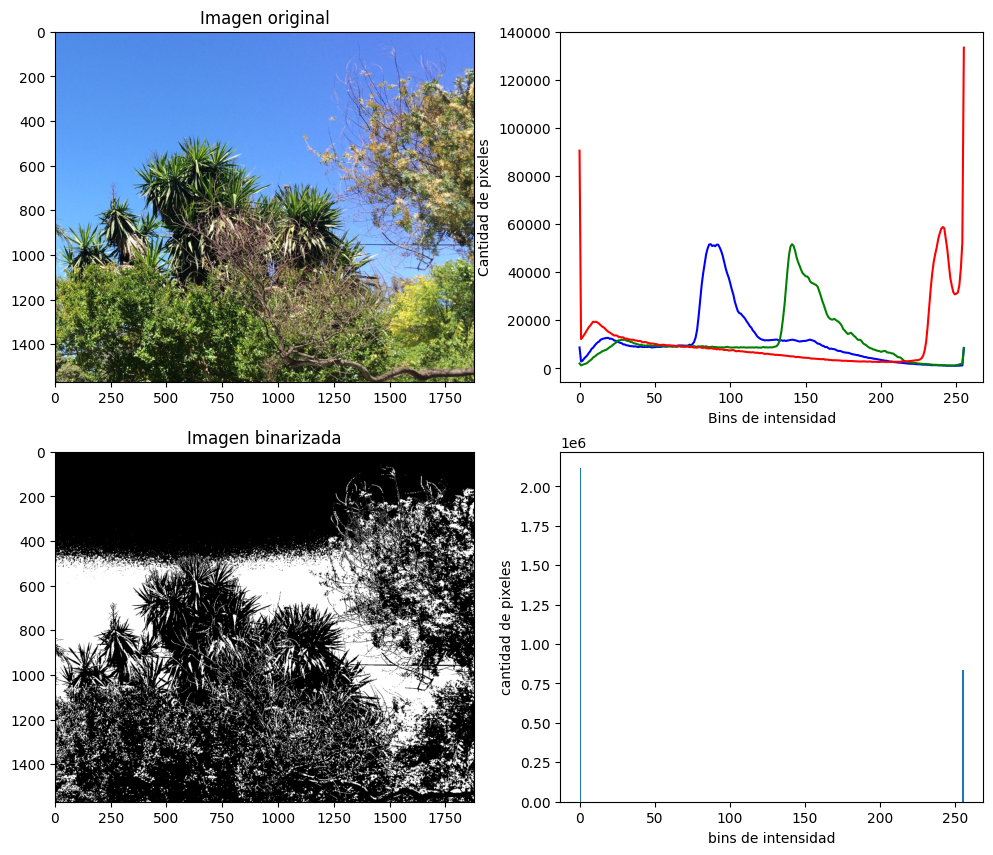

In [16]:
#@title Seleccione el umbral de binarización { run: "auto" }
Umbral = 150 #@param {type:"slider", min:0, max:255, step:1}

ret,binaria = cv2.threshold(img,Umbral,255,cv2.THRESH_BINARY)

print(ret)
hist1, hist2, hist3 = histo_RGB(img_col)

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(10)
fig.set_figwidth(12)
axs[0].imshow(img_col, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')
axs[1].plot(hist1,color='b')
axs[1].plot(hist2,color='g')
axs[1].plot(hist3,color='r') 
axs[1].set_xlabel('Bins de intensidad')
axs[1].set_ylabel('Cantidad de pixeles')

axs[2].imshow(binaria, cmap='gray',vmin=0 ,vmax=255)
axs[2].set_title('Imagen binarizada')

axs[3].hist(binaria[:,:].ravel(), 256,[0,256] ) 
axs[3].set_xlabel('bins de intensidad')
axs[3].set_ylabel('cantidad de pixeles')

plt.show()

##3. **Clustering**

+ a) Pase la misma imagen vegetacion_cielo.jpg, a formato Data Frame (cada pixel en una fila)
+ b) Elija algún modelo de Clusterización (k-means,DBCAN, MeanShift) para realizar clusterización dentro de dicha imagen. 
Utilice las características que crea necesarias  y adecuadas para el problema (RGB a priori, pero pueden ser otras como las usadas en Ntb8).
¿Cuantos clusters recomienda el método del codo? ¿Concuerda con lo que ve en la imagen? 
+ c) Grafique los resultados de la clusterización en el espacio RGB y también en la imagen etiquetada por clusters.Obtuvo los resultados esperados? Comente, interprete.

##3.1. RGB to Data Frame

In [17]:
image = "/content/drive/MyDrive/Colab Notebooks/vegetacion_cielo.jpg"#Lectura de la imagen
img = cv2.imread(image)#Leemos la imagen
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#Conversión de la imagen del campo BGR a RGB

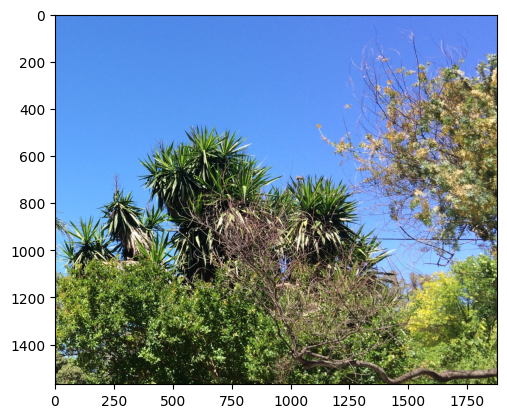

In [18]:
plt.imshow(img) #Visualización de la imagen
plt.grid (False)
plt.show()

In [19]:
dims=img.shape
cant_filas=dims[0]
cant_columnas=dims[1]
ind=np.indices((cant_filas,cant_columnas)) # arreglo que guarda los indices (i,j) , En el lugar 0 guarda las filas y en el 1 las cols

cant_pixeles=cant_filas*cant_columnas
columnas=np.zeros([cant_pixeles,5],dtype='int')

data0=np.zeros([cant_pixeles,5],dtype='int')
data0[:,0]=ind[0].flatten() #filas
data0[:,1]=ind[1].flatten() #columnas
data0[:,2]=img[:,:,0].flatten() #rojo
data0[:,3]=img[:,:,1].flatten() # verde
data0[:,4]=img[:,:,2].flatten() # azul

df = pd.DataFrame(data0, columns=["Fila", "Columna","Rojo","Verde","Azul"])

print(df.shape)
print('Base de pixeles:')
df.head()  

(2948151, 5)
Base de pixeles:


Fila  Columna  Rojo  Verde  Azul
0     0        0    80    139   233
1     0        1    78    137   231
2     0        2    78    137   231
3     0        3    79    138   232
4     0        4    80    139   233

In [20]:
X=data0[:,2:5] # sólo r,g,b

In [21]:
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

std_scale=preprocessing.StandardScaler().fit(X) #resta la media  de cada columna y luego divide por el desvío
X_scaled=std_scale.transform(X)

Veamos la distribución de las componente R,G,B dentro de la imagen

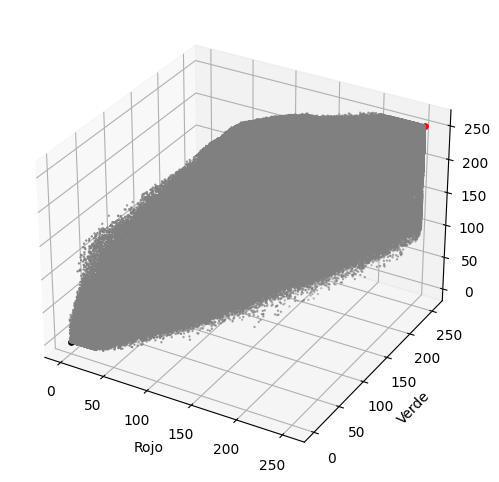

In [22]:
#@title Seleccione el umbral de binarización { run: "auto" }
graph_dimension  = '3D' #@param ["2D", "3D"]
EjeX  = 'Azul' #@param ["Rojo","Verde","Azul"]
EjeY = 'Rojo' #@param ["Rojo","Verde","Azul"]

if graph_dimension == '2D':
  f0 = df[EjeX].values
  f1 = df[EjeY].values
  plt.scatter(f0, f1,c='gray', s=1)
  plt.xlabel(EjeX)
  plt.ylabel(EjeY)
  plt.show()

elif graph_dimension == '3D':

  variables=["Rojo","Verde","Azul"]
  fig = plt.figure(figsize=(8,6))
  ax=fig.add_subplot(111, projection='3d')

  ax.scatter(df[variables[0]].values, df[variables[1]].values, df[variables[2]].values,c='gray', s=0.5)
  ax.scatter(0,0,0,c='black', s=15) #estoy resaltando el (0 0 0) negro
  ax.scatter(255,255,255,c='red', s=15) #estoy resaltando el (255 255 255) blanco

  ax.set_xlabel(variables[0])
  ax.set_ylabel(variables[1])

  plt.show()


##Interpretación
El presente aplicativo permite al usuario visualizar las componentes R, G, B de la imagen en 2 y 3 dimensiones. Para el caso de 2D, se puede seleccionar la componente que representara el eje X e Y del gráfico, sin embargo, para el caso 3D la selección de las componente esta predeterminada.

##3.2. Codo de Jambu
Permite determinar cuál es el clúster más apropiado

In [23]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

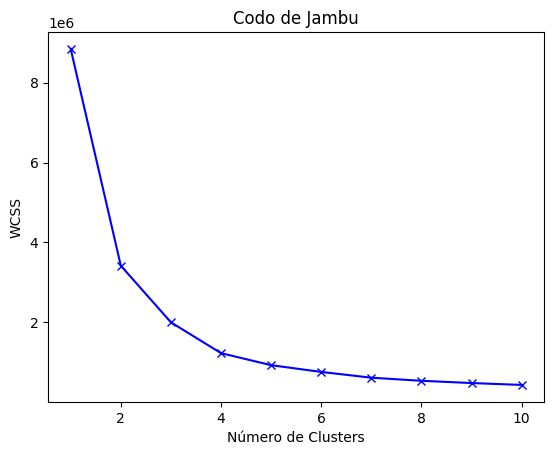

In [24]:
plt.plot(range(1,11),wcss, 'bx-')
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()

Se considera el clúster más apropiado donde la suma de los cuadrados de las distancias deja de caer bruscamente. Para este estudio en particular se tomará el valor de 4. Si apreciamos la imagen intentaremos separar lo correspondiente a los colores celeste, verde, amarillo y café

In [25]:
kmeans = KMeans(n_clusters=4, max_iter = 300, random_state=0).fit(X_scaled)
kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [26]:
df_km=df.copy()
df_km['KMeans_Clusters'] = kmeans.labels_
df_km.head()

Fila  Columna  Rojo  Verde  Azul  KMeans_Clusters
0     0        0    80    139   233                0
1     0        1    78    137   231                0
2     0        2    78    137   231                0
3     0        3    79    138   232                0
4     0        4    80    139   233                0

In [27]:
imagen_kmedias_scaled=np.reshape(kmeans.labels_, (cant_filas,cant_columnas))
#veamos algunas de sus entradas

print(imagen_kmedias_scaled[0:10,:]) #es la matriz con los pixles etiquetados!!!

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


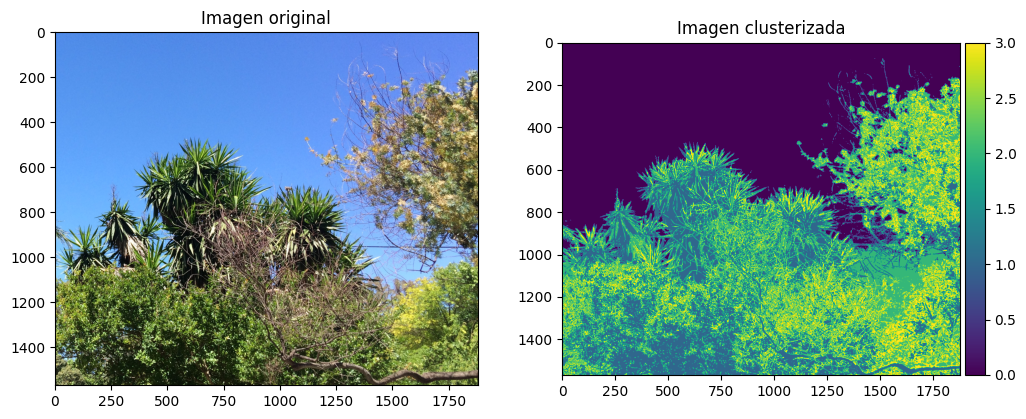

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(10)
fig.set_figwidth(12)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')

axs[1].imshow(imagen_kmedias_scaled)
axs[1].set_title('Imagen clusterizada')

divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(axs[1].imshow(imagen_kmedias_scaled), cax=cax, orientation='vertical')
plt.show()

##Interpretación
La imagen clusterizada, permite diferenciar entre el cielo y la vegetación.

(1569, 1879, 3)
[2]


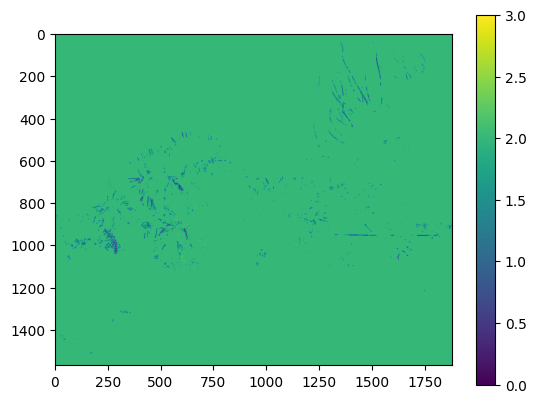

In [29]:
a=img.shape
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(kmeans.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=kmeans.predict([img[i,j,:]])        
clasif[0,0]=0 #para unificar paletas (con 4 colores)         
plt.imshow(clasif)
plt.colorbar()
plt.show()

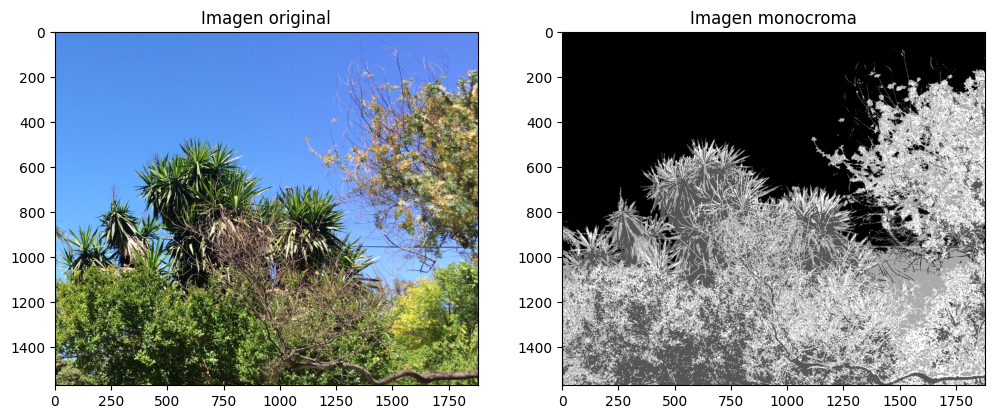

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False)
axs=axs.ravel()
fig.set_figheight(10)
fig.set_figwidth(12)
axs[0].imshow(img, cmap='gray',vmin=0 ,vmax=255)
axs[0].set_title('Imagen original')

axs[1].imshow(imagen_kmedias_scaled,cmap='gray')
axs[1].set_title('Imagen monocroma')
plt.show()